In [1]:
# Data manipulation
import numpy as np
import utils
import prediction

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import loguniform

sns.set_theme(style="whitegrid")

In [2]:
df = utils.read_csv()

df[["Stock", "Sector", "Class", "Year"]] = df[["Stock", "Sector", "Class", "Year"]].astype("category")

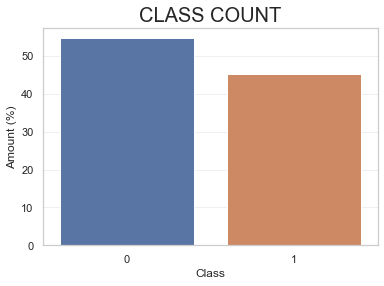

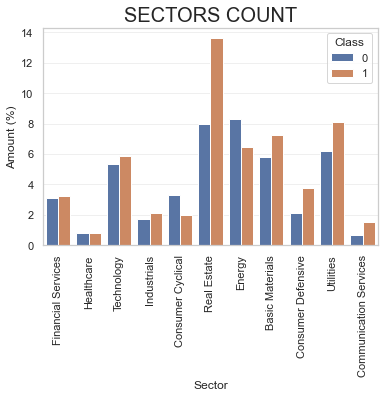

In [3]:
# Plot class distribution
df_class = df['Class'].value_counts() / df.shape[0] * 100
sns.barplot(np.arange(len(df_class)), df_class)
plt.ylabel('Amount (%)')
plt.xlabel('Class')
plt.grid(alpha=0.3, axis='y')
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df_sector = df[['Sector', 'Class']].value_counts() / df.shape[0] * 100
df_sector.to_frame()
df_sector = df_sector.reset_index()
sns.barplot(x='Sector', y=df_sector.iloc[:,2], hue='Class', data=df_sector)
plt.ylabel('Amount (%)')
plt.xlabel('Sector')
plt.xticks(np.arange(len(df_sector["Sector"].unique())), df_sector["Sector"].unique(), rotation=90)
plt.grid(alpha=0.3, axis='y')
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [4]:
#Train - Test Split
df_train, df_test = prediction.split_data_sets_for_svm(df, test_size=0.2)

---

## Model building

In [5]:
# Target Extraction
df_train_target = df_train.pop("Class")
df_test_target = df_test.pop("Class")

In [6]:
#Categorical and Continuous Variables
cont_vars = df_train.select_dtypes(include="number").columns.values
cat_vars = df_train.select_dtypes(include="category").columns.values

print('Continuous variables:')
print(cont_vars)
print('\nCategorical variables:')
print(cat_vars)

Continuous variables:
['Revenue' 'Revenue Growth' 'Gross Profit' 'R&D Expenses' 'SG&A Expense'
 'Operating Expenses' 'Operating Income' 'Interest Expense'
 'Earnings before Tax' 'Income Tax Expense'
 'Net Income - Non-Controlling int' 'Net Income - Discontinued ops'
 'Net Income' 'Preferred Dividends' 'EPS' 'Weighted Average Shs Out'
 'Weighted Average Shs Out (Dil)' 'Dividend per Share' 'Gross Margin'
 'EBIT Margin' 'Free Cash Flow margin' 'EBITDA'
 'Cash and cash equivalents' 'Receivables' 'Inventories'
 'Property, Plant & Equipment Net' 'Goodwill and Intangible Assets'
 'Tax assets' 'Total assets' 'Payables' 'Long-term debt' 'Total debt'
 'Deferred revenue' 'Tax Liabilities' 'Deposit Liabilities'
 'Total liabilities' 'Other comprehensive income'
 'Retained earnings (deficit)' 'Total shareholders equity' 'Investments'
 'Other Liabilities' 'Depreciation & Amortization'
 'Stock-based compensation' 'Operating Cash Flow' 'Capital Expenditure'
 'Acquisitions and disposals' 'Investment pur

---

## SVM model with linear kernel

In [7]:
svc_linear = SVC(cache_size=6000, max_iter=50000, kernel='linear')

pipeline = prediction.make_pipeline_for_svm(cat_vars, cont_vars, svc_linear)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  array(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income -...
       'Receivables Turnover', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth', 'EPS Growth',
       'Operating Cash Flow growth', 'Receivables growth', 'Asset Growth'],
      dtype=object)),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
          

In [8]:
# Training SVM Linear Kernel
%timeit svc_linear_fitted = pipeline.fit(df_train, df_train_target)

30.6 s ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
y_pred = pipeline.predict(df_train)

print(classification_report(df_train_target, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.73      0.55      0.63      6747
     class 1       0.70      0.83      0.76      8299

    accuracy                           0.71     15046
   macro avg       0.71      0.69      0.69     15046
weighted avg       0.71      0.71      0.70     15046



* The precision will be "how many are correctly classified among that class"
    * Precision = TP / (TP + FP)
* The recall means "how many of this class we find over the whole number of element of this class"
    *  Recall = TP / (TP + FN)
* The f1-score is the harmonic mean between precision & recall
    * F1 Score = 2 * (Recall * Precision) / (Recall + Precision)
* The support is the number of occurence of the given class in our dataset

Use weighted avg f1-score to compare models.

---

## SVM model with polynomial kernel (degree 2)

In [10]:
svc_poly_2 = SVC(cache_size=6000, max_iter=50000, kernel='poly', degree=2)

pipeline = prediction.make_pipeline_for_svm(cat_vars, cont_vars, svc_poly_2)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  array(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income -...
       'Receivables Turnover', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth', 'EPS Growth',
       'Operating Cash Flow growth', 'Receivables growth', 'Asset Growth'],
      dtype=object)),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
          

In [11]:
# Training SVM Linear Kernel
%timeit svc_poly_2_fitted = pipeline.fit(df_train, df_train_target)

42.9 s ± 364 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
y_pred = pipeline.predict(df_train)

print(classification_report(df_train_target, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.76      0.24      0.36      6747
     class 1       0.60      0.94      0.73      8299

    accuracy                           0.62     15046
   macro avg       0.68      0.59      0.55     15046
weighted avg       0.67      0.62      0.57     15046



---

## SVM model with polynomial kernel (degree 3)

In [13]:
svc_poly_3 = SVC(cache_size=6000, max_iter=50000, kernel='poly', degree=3)

pipeline = prediction.make_pipeline_for_svm(cat_vars, cont_vars, svc_poly_3)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  array(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income -...
       'Receivables Turnover', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth', 'EPS Growth',
       'Operating Cash Flow growth', 'Receivables growth', 'Asset Growth'],
      dtype=object)),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
          

In [14]:
# Training SVM Linear Kernel
%timeit svc_poly_3_fitted = pipeline.fit(df_train, df_train_target)

43.5 s ± 321 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
y_pred = pipeline.predict(df_train)

print(classification_report(df_train_target, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.97      0.16      0.27      6747
     class 1       0.59      1.00      0.74      8299

    accuracy                           0.62     15046
   macro avg       0.78      0.58      0.51     15046
weighted avg       0.76      0.62      0.53     15046



---

## SVM model with rbf kernel

In [16]:
svc_rbf = SVC(cache_size=6000, max_iter=50000, kernel='rbf')

pipeline = prediction.make_pipeline_for_svm(cat_vars, cont_vars, svc_rbf)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  array(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income -...
       'Receivables Turnover', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth', 'EPS Growth',
       'Operating Cash Flow growth', 'Receivables growth', 'Asset Growth'],
      dtype=object)),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
          

In [17]:
# Training SVM Linear Kernel
%timeit svc_rbf_fitted = pipeline.fit(df_train, df_train_target)

36.7 s ± 366 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
y_pred = pipeline.predict(df_train)

print(classification_report(df_train_target, y_pred, target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.70      0.63      0.66      6747
     class 1       0.72      0.79      0.75      8299

    accuracy                           0.71     15046
   macro avg       0.71      0.71      0.71     15046
weighted avg       0.71      0.71      0.71     15046



---

## Hyperparameter tuning for final model

In [19]:
svc_rbf = SVC(cache_size=6000, max_iter=50000, kernel='rbf')

pipeline = prediction.make_pipeline_for_svm(cat_vars, cont_vars, svc_rbf)

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical scaler',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  array(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income -...
       'Receivables Turnover', 'Gross Profit Growth', 'EBIT Growth',
       'Operating Income Growth', 'Net Income Growth', 'EPS Growth',
       'Operating Cash Flow growth', 'Receivables growth', 'Asset Growth'],
      dtype=object)),
                                                 ('one hot encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
          

In [20]:
# Define Model Parameters for Grid Search
model_params = {
                'svc model__C':loguniform(1e-1, 1e2),
                'svc model__coef0':loguniform(1e0, 1e6),
                'svc model__gamma':loguniform(1e-2, 1e1)
                }

In [21]:
# Grid Search
prediction.find_best_parameters_for_model(pipeline,
                                          df_train,
                                          df_train_target,
                                          model_params,
                                          scoring='f1',
                                          n_iter=100,
                                          n_splits=5,
                                          n_repeats=2,
                                          verbose=10)

Running grid search for the model based on f1
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538
[CV 1/10; 1/100] END svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538;, score=0.717 total time=  29.4s
[CV 2/10; 1/100] START svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538
[CV 2/10; 1/100] END svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538;, score=0.715 total time=  29.2s
[CV 3/10; 1/100] START svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538
[CV 3/10; 1/100] END svc model__C=1.3292918943162162, svc model__coef0=506157.6888752303, svc model__gamma=1.570297088405538;, score=0.716 total time=  29.7s
[CV 4/10; 1/100] START svc model__

KeyboardInterrupt: 